Importing necessary libraries for Electric Vehicle Analysis


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pg


In [139]:
df = pd.read_csv("ElectricCarData_Clean.csv")

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [85]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [86]:
df.isnull().sum()


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

This implies that data is not incomplete and hence no null values

In [87]:
df.duplicated().sum()

0

C:\Users\Sahib Preet Singh\AppData\Local\Temp\ipykernel_16328\3987237571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Range_Km'])


<Axes: xlabel='Range_Km', ylabel='Density'>

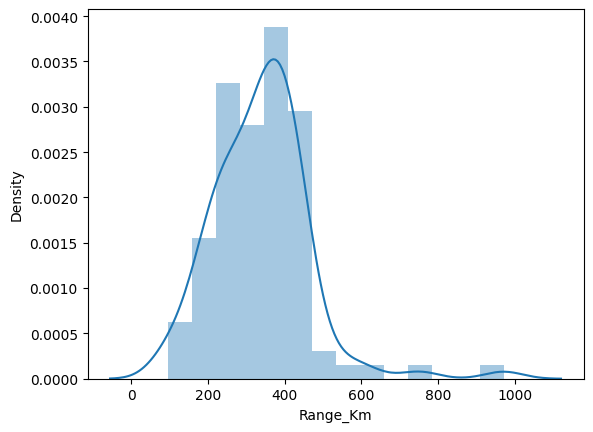

In [142]:
sns.distplot(df['Range_Km'])


  The plot between Range of particular car with its price

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


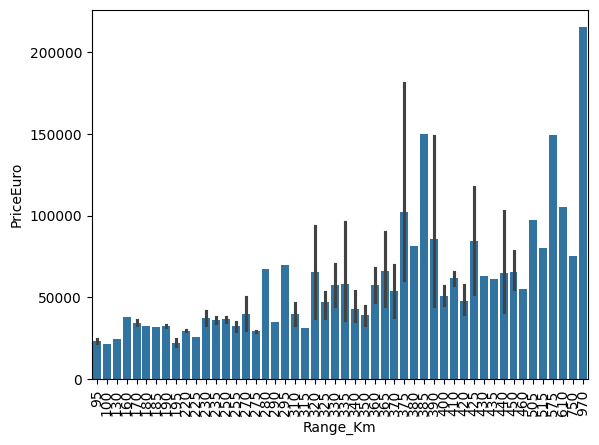

<Figure size 3000x3000 with 0 Axes>

In [89]:
sns.barplot(x=df['Range_Km'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,30))
plt.show()

To understand this graph is not feasible, so instead of discrete values we are converting into bins

In [143]:
max_value = df['Range_Km'].max()
print(max_value)

970


In [144]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Optionally, define labels for the bins
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Bin the Range_km values
df['Range_km_binned'] = pd.cut(df['Range_Km'], bins=bins, labels=labels, right=False)

In [145]:
df['Range_km_binned'].value_counts()

300-400     35
400-500     25
200-300     23
100-200     12
500-600      3
0-100        2
600-700      1
700-800      1
900-1000     1
800-900      0
Name: Range_km_binned, dtype: int64

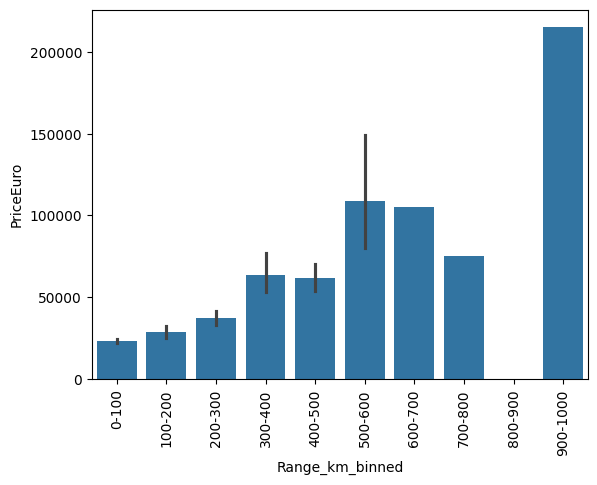

<Figure size 3000x3000 with 0 Axes>

In [146]:
sns.barplot(x=df['Range_km_binned'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,30))
plt.show()

-> From the above graph, we can conclude that the cars with high range of 900+ is costly but the car having range between 500-700 are similar in price.

In [148]:
# Dropping the column because no longer needed
df.drop(columns=['Range_Km'], inplace=True)

df.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Range_km_binned
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,400-500
1,Volkswagen,ID.3 Pure,10.0,160,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,200-300
2,Polestar,2,4.7,210,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,400-500
3,BMW,iX3,6.8,180,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,300-400
4,Honda,e,9.5,145,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,100-200


Graph between the relation of vehicles's top speed with its Price

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


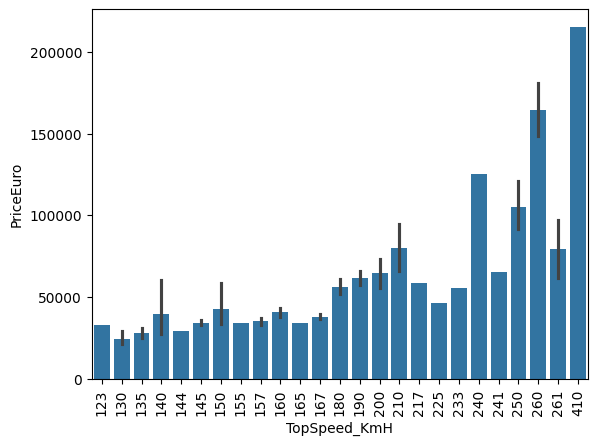

<Figure size 3000x3000 with 0 Axes>

In [95]:
sns.barplot(x=df['TopSpeed_KmH'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,30))
plt.show()

Though Top Speed is one of the matter to focus but with the existing data, we can not estimate the price with its top speed

Graph between the relation of vehicles Efficiency  with its Price

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


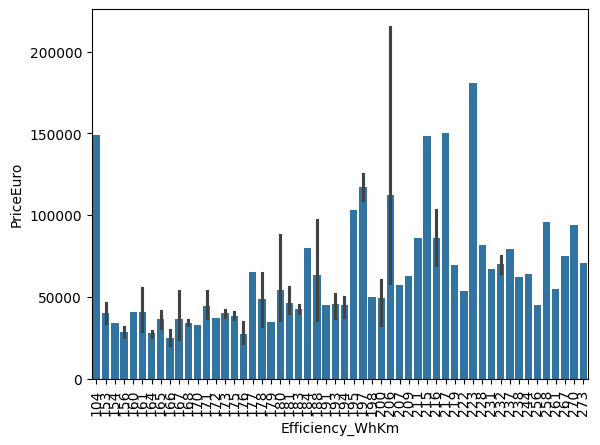

<Figure size 3000x3000 with 0 Axes>

In [96]:
sns.barplot(x=df['Efficiency_WhKm'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,30))
plt.show()

Similarly like range, we have to  perform data processing to understand data in better format

In [149]:
max_value = df['Efficiency_WhKm'].max()
print(max_value)

273


In [150]:
bins_efficiency = list(range(0, 301, 50))  # Creates bins [0, 50, 100, ..., 300]

# Create labels for the bins
labels_efficiency = [f"{bins_efficiency[i]}-{bins_efficiency[i+1]-1}" for i in range(len(bins_efficiency)-1)]

# Bin the efficiency_WhKm values
df['efficiency_WhKm_binned'] = pd.cut(df['Efficiency_WhKm'], bins=bins_efficiency, labels=labels_efficiency, right=False)

# Drop the original 'efficiency_WhKm' column
df.drop(columns=['Efficiency_WhKm'], inplace=True)

In [151]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Range_km_binned,efficiency_WhKm_binned
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,400-500,150-199
1,Volkswagen,ID.3 Pure,10.0,160,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,200-300,150-199
2,Polestar,2,4.7,210,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,400-500,150-199
3,BMW,iX3,6.8,180,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,300-400,200-249
4,Honda,e,9.5,145,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,100-200,150-199


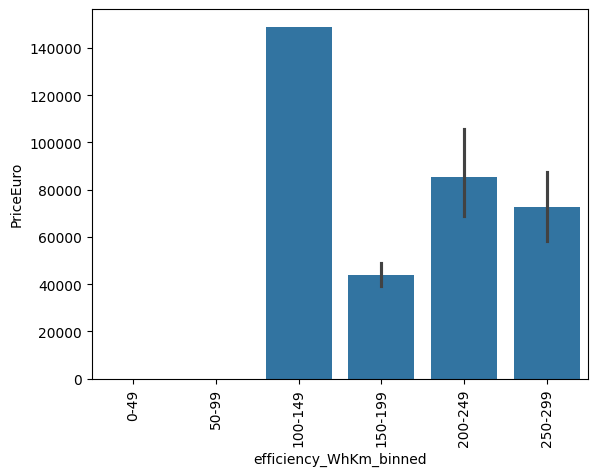

<Figure size 3000x3000 with 0 Axes>

In [100]:
sns.barplot(x=df['efficiency_WhKm_binned'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,30))
plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Brand                   103 non-null    object  
 1   Model                   103 non-null    object  
 2   AccelSec                103 non-null    float64 
 3   TopSpeed_KmH            103 non-null    int64   
 4   FastCharge_KmH          103 non-null    object  
 5   RapidCharge             103 non-null    object  
 6   PowerTrain              103 non-null    object  
 7   PlugType                103 non-null    object  
 8   BodyStyle               103 non-null    object  
 9   Segment                 103 non-null    object  
 10  Seats                   103 non-null    int64   
 11  PriceEuro               103 non-null    int64   
 12  Range_km_binned         103 non-null    category
 13  efficiency_WhKm_binned  103 non-null    category
dtypes: category(2), float64(1)

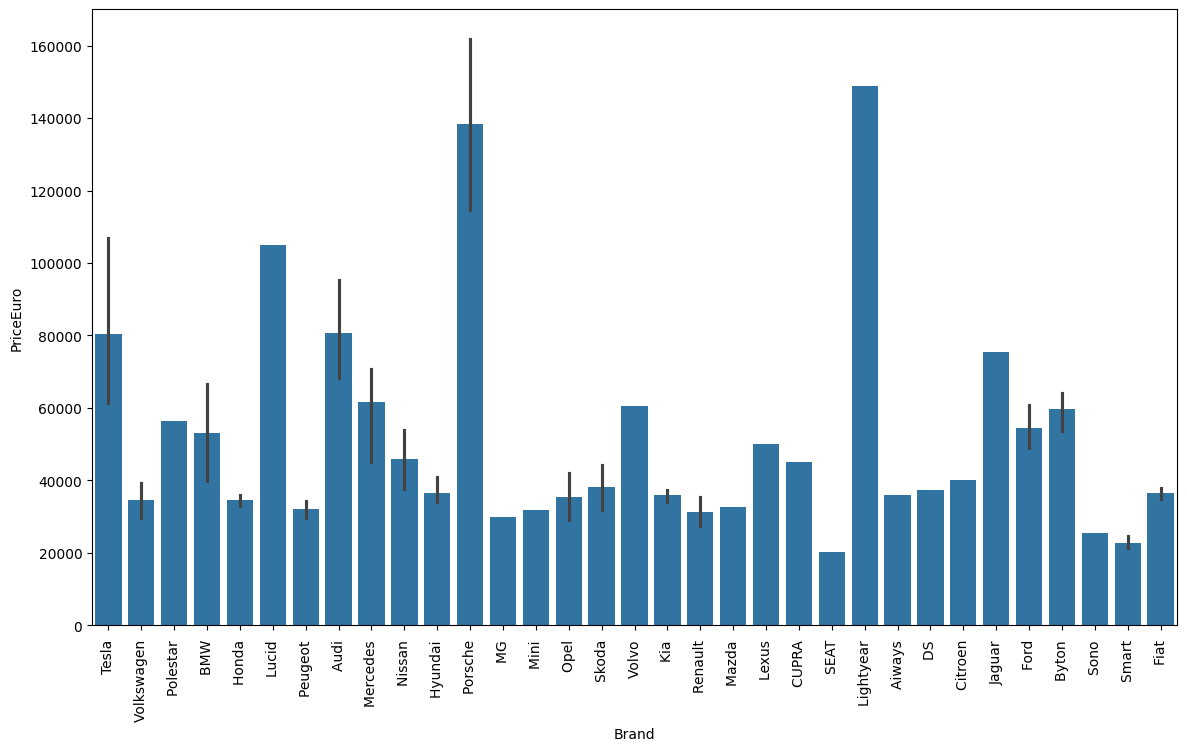

In [153]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['Brand'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

We have observed that car brands like Porsche, Lucid, Lightyear are few of the costliest car brands

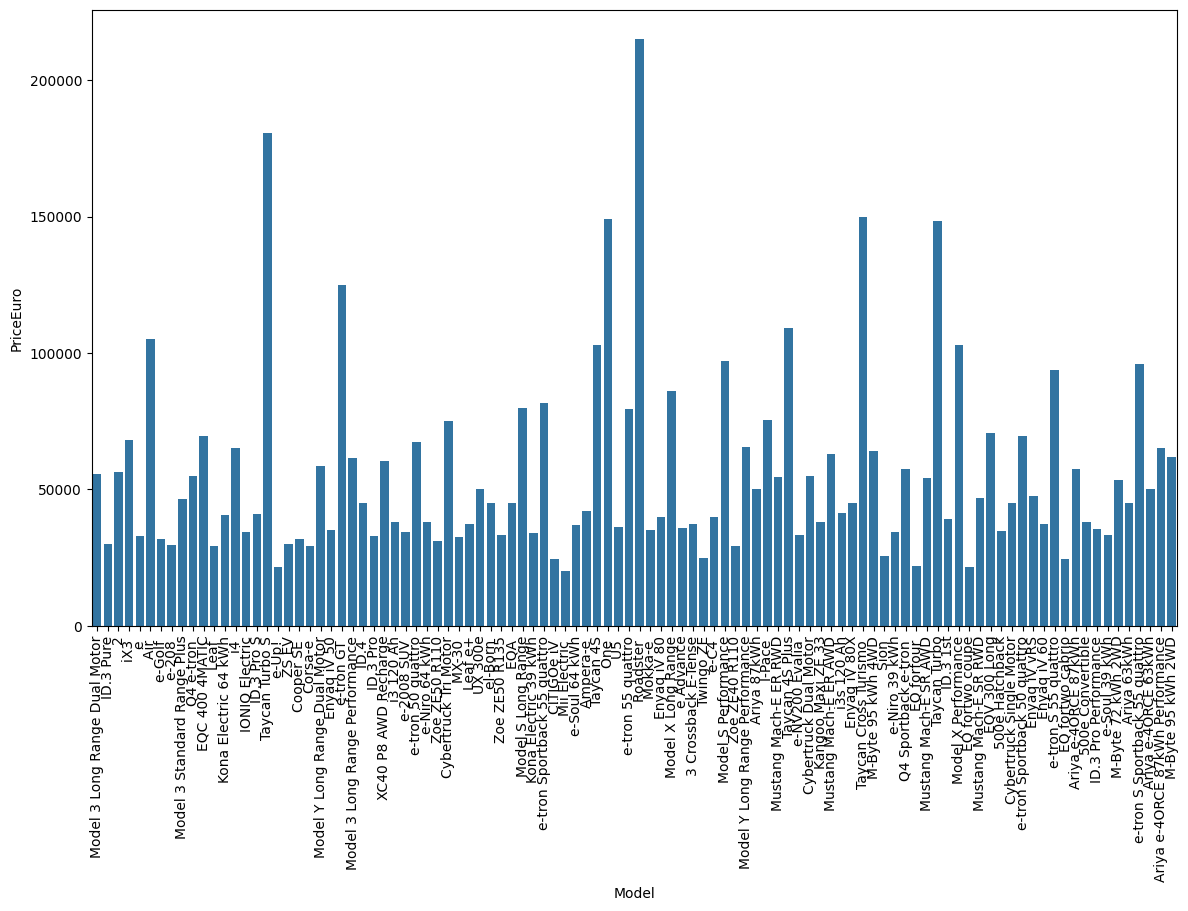

In [154]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['Model'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

In [155]:
df.drop(columns='Model', inplace=True)

Dropping the column because it is infeasible to study data with so many models 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Brand                   103 non-null    object  
 1   AccelSec                103 non-null    float64 
 2   TopSpeed_KmH            103 non-null    int64   
 3   FastCharge_KmH          103 non-null    object  
 4   RapidCharge             103 non-null    object  
 5   PowerTrain              103 non-null    object  
 6   PlugType                103 non-null    object  
 7   BodyStyle               103 non-null    object  
 8   Segment                 103 non-null    object  
 9   Seats                   103 non-null    int64   
 10  PriceEuro               103 non-null    int64   
 11  Range_km_binned         103 non-null    category
 12  efficiency_WhKm_binned  103 non-null    category
dtypes: category(2), float64(1), int64(3), object(7)
memory usage: 9.8+ KB


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


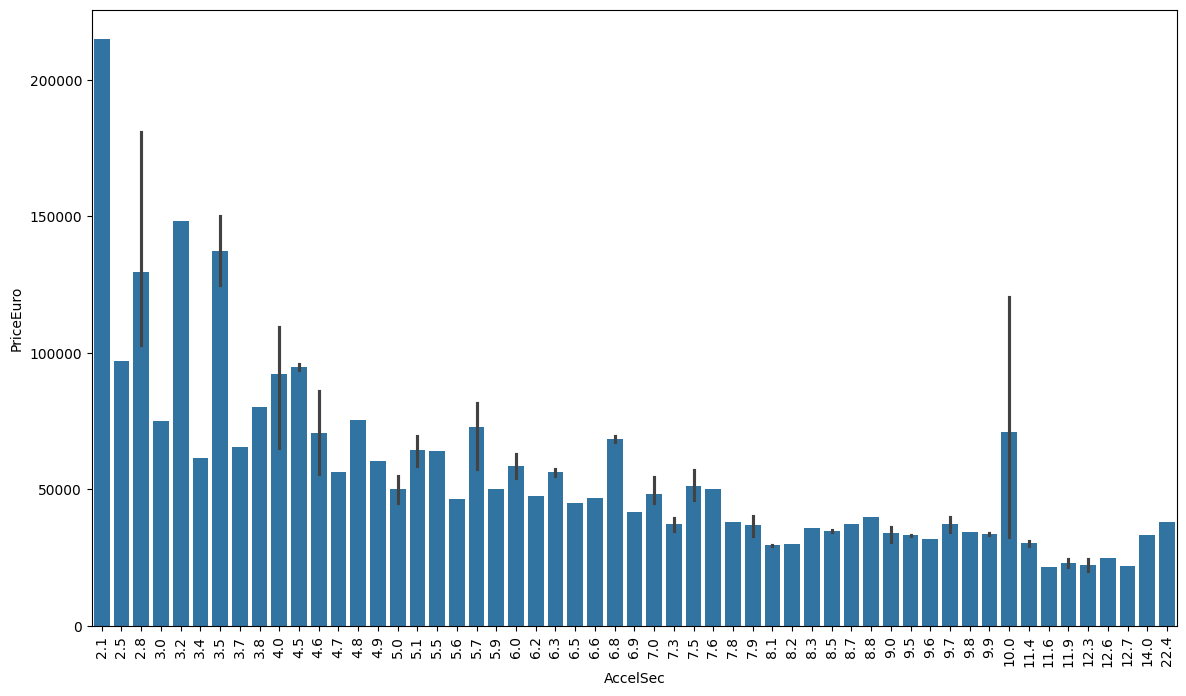

In [156]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['AccelSec'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

Dropping AccelSec column because it has no correlation with price

In [157]:
df.drop(columns='AccelSec', inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Brand                   103 non-null    object  
 1   TopSpeed_KmH            103 non-null    int64   
 2   FastCharge_KmH          103 non-null    object  
 3   RapidCharge             103 non-null    object  
 4   PowerTrain              103 non-null    object  
 5   PlugType                103 non-null    object  
 6   BodyStyle               103 non-null    object  
 7   Segment                 103 non-null    object  
 8   Seats                   103 non-null    int64   
 9   PriceEuro               103 non-null    int64   
 10  Range_km_binned         103 non-null    category
 11  efficiency_WhKm_binned  103 non-null    category
dtypes: category(2), int64(3), object(7)
memory usage: 9.0+ KB


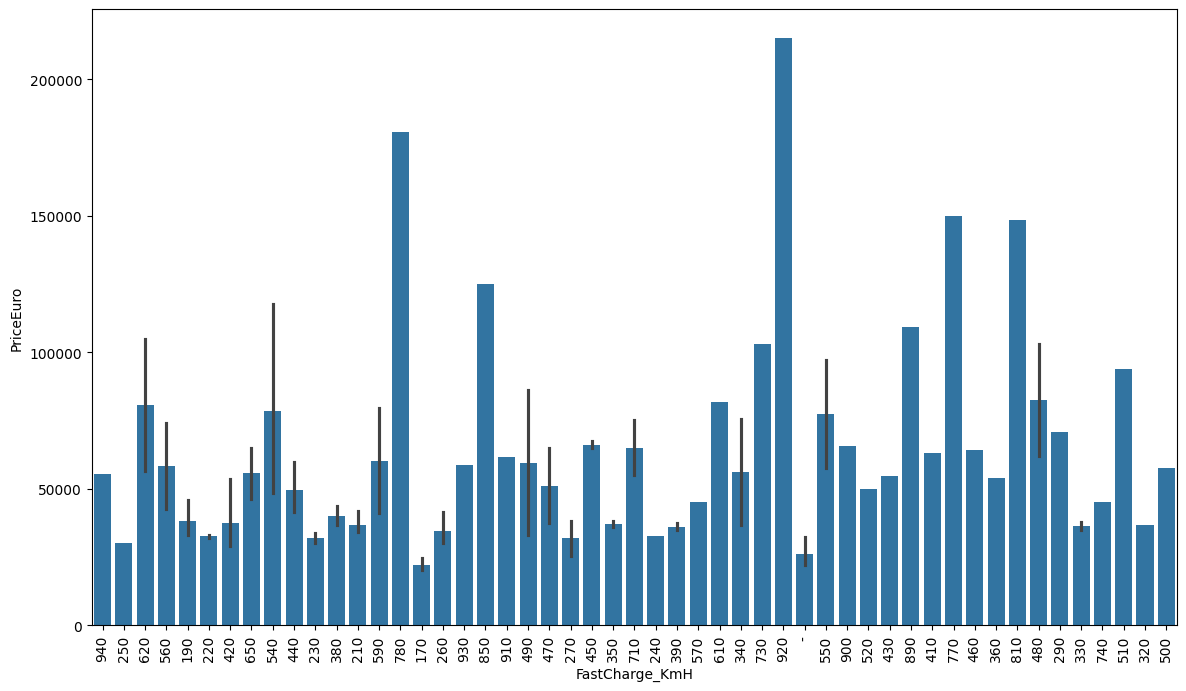

In [159]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['FastCharge_KmH'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

In [160]:
df['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

Dropping rows with inconsistent data

In [161]:
dash_count = (df['FastCharge_KmH'] == '-').sum()

print(f"Number of occurrences of '-': {dash_count}")


Number of occurrences of '-': 5


In [162]:
df = df[df['FastCharge_KmH'] != '-']


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Brand                   98 non-null     object  
 1   TopSpeed_KmH            98 non-null     int64   
 2   FastCharge_KmH          98 non-null     object  
 3   RapidCharge             98 non-null     object  
 4   PowerTrain              98 non-null     object  
 5   PlugType                98 non-null     object  
 6   BodyStyle               98 non-null     object  
 7   Segment                 98 non-null     object  
 8   Seats                   98 non-null     int64   
 9   PriceEuro               98 non-null     int64   
 10  Range_km_binned         98 non-null     category
 11  efficiency_WhKm_binned  98 non-null     category
dtypes: category(2), int64(3), object(7)
memory usage: 9.2+ KB


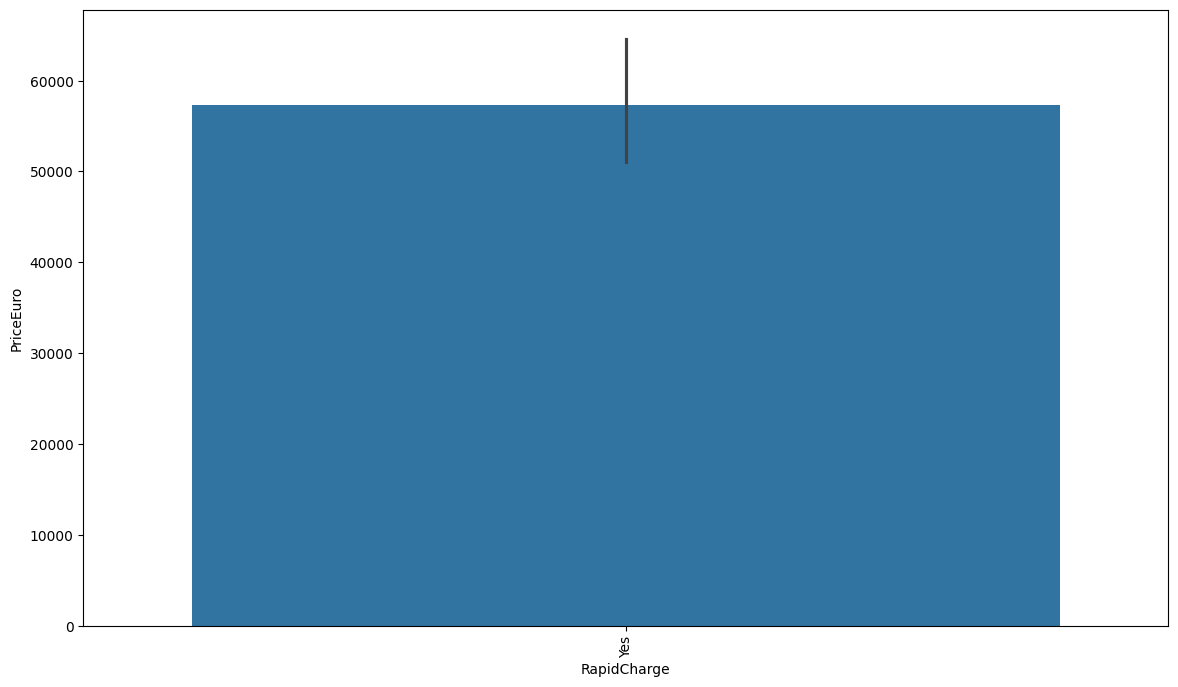

In [164]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['RapidCharge'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

All cars are providing Rapid Charge, this is not an important information to perform data analysis  

In [165]:
df.drop(columns="RapidCharge", inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Brand                   98 non-null     object  
 1   TopSpeed_KmH            98 non-null     int64   
 2   FastCharge_KmH          98 non-null     object  
 3   PowerTrain              98 non-null     object  
 4   PlugType                98 non-null     object  
 5   BodyStyle               98 non-null     object  
 6   Segment                 98 non-null     object  
 7   Seats                   98 non-null     int64   
 8   PriceEuro               98 non-null     int64   
 9   Range_km_binned         98 non-null     category
 10  efficiency_WhKm_binned  98 non-null     category
dtypes: category(2), int64(3), object(6)
memory usage: 8.4+ KB


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


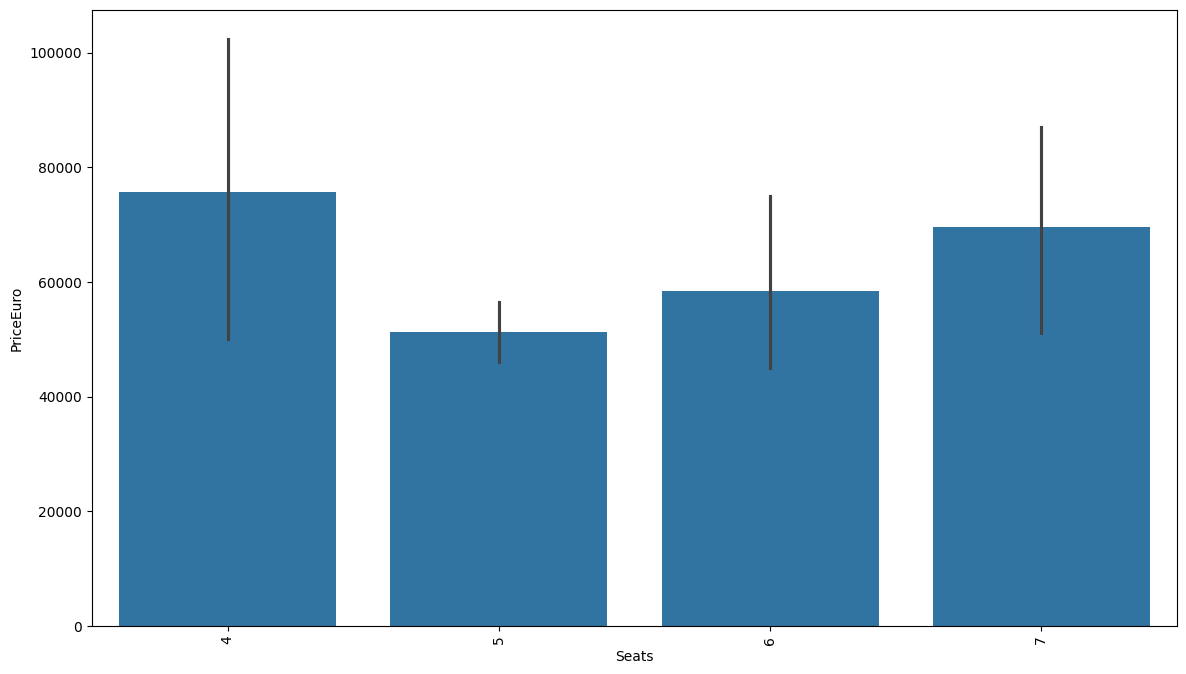

In [167]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['Seats'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

Important Analysis between PlugType, PriceEuro and Range of car

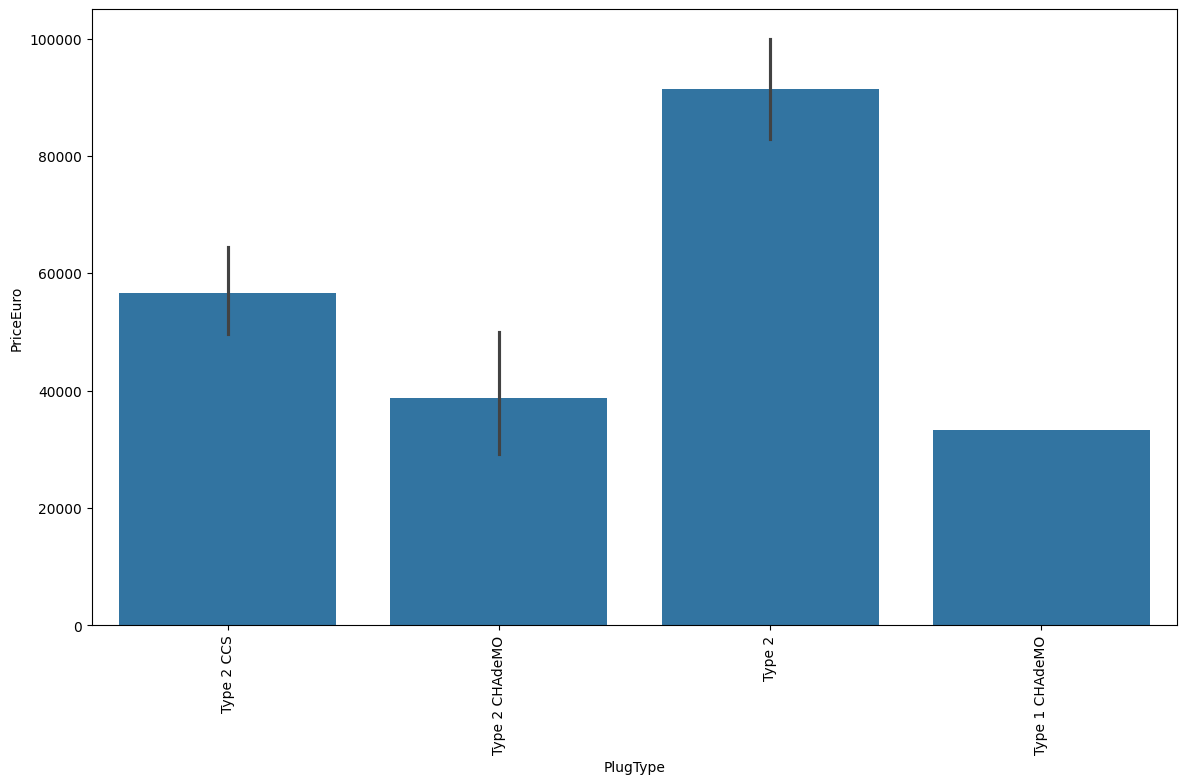

In [169]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['PlugType'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

This shows that Type2 plug type charging cars are costliest

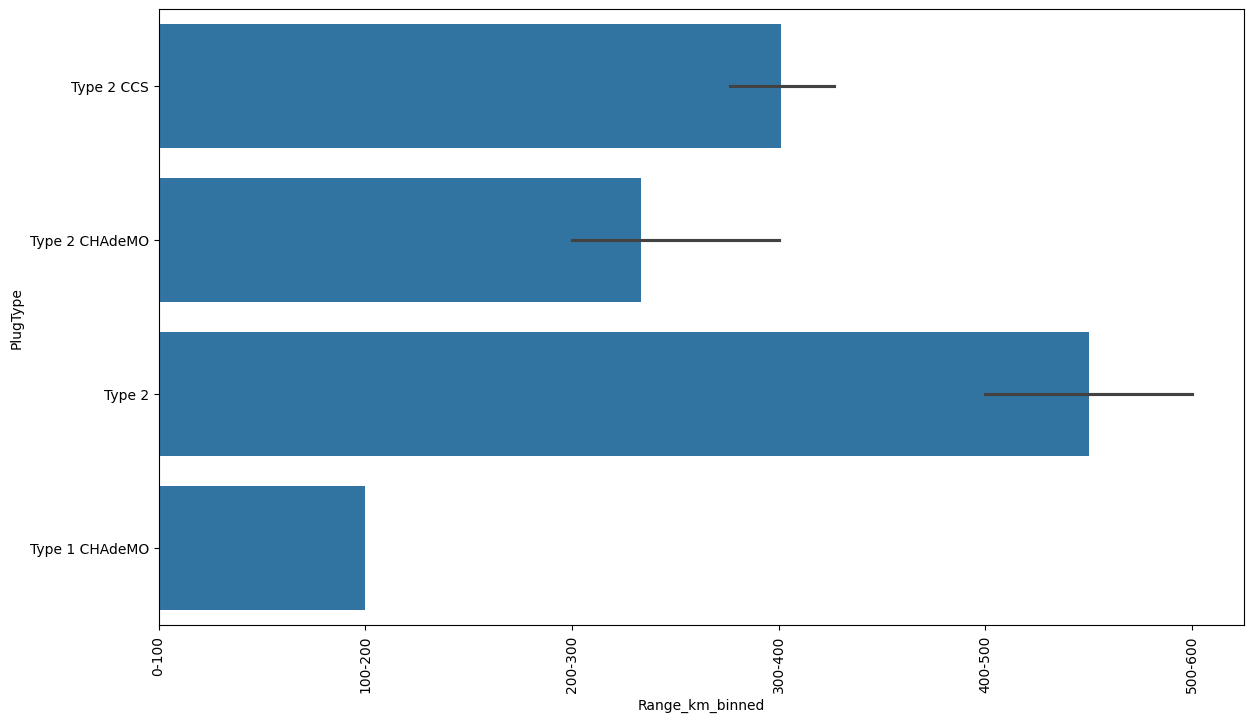

In [120]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['Range_km_binned'], y=df['PlugType'], orient='h')
plt.xticks(rotation='vertical')
plt.show()

and this provides that highest range values are of cars having type 2 plug type charging

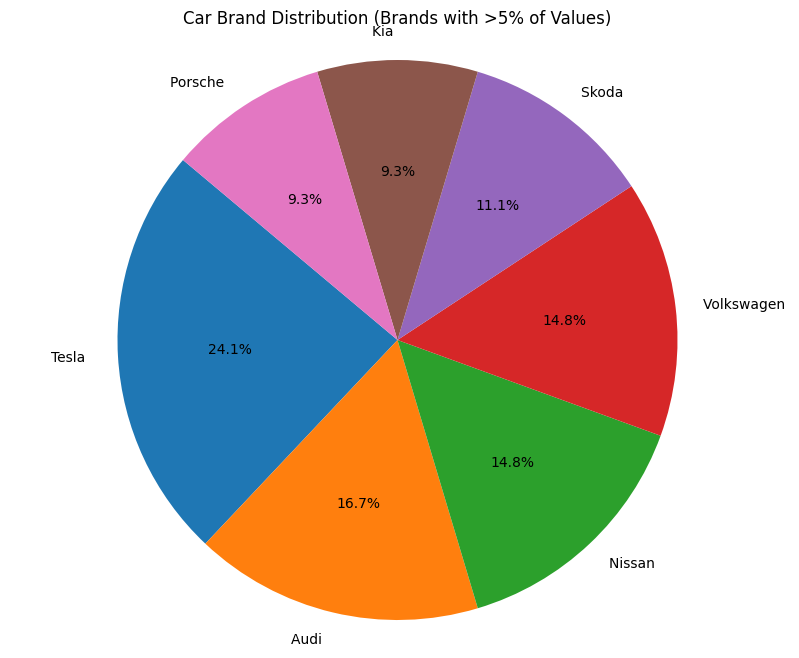

In [170]:
brand_counts = df['Brand'].value_counts()

# Calculate the threshold for 5% of the dataset
threshold = 0.05 * len(df)

# Filter brands that have more than 5% of the values
filtered_brands = brand_counts[brand_counts > threshold]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(filtered_brands, labels=filtered_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Car Brand Distribution (Brands with >5% of Values)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

These are the top 5 car brand selling electric vehicles

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Brand                   98 non-null     object  
 1   TopSpeed_KmH            98 non-null     int64   
 2   FastCharge_KmH          98 non-null     object  
 3   PowerTrain              98 non-null     object  
 4   PlugType                98 non-null     object  
 5   BodyStyle               98 non-null     object  
 6   Segment                 98 non-null     object  
 7   Seats                   98 non-null     int64   
 8   PriceEuro               98 non-null     int64   
 9   Range_km_binned         98 non-null     category
 10  efficiency_WhKm_binned  98 non-null     category
dtypes: category(2), int64(3), object(6)
memory usage: 8.4+ KB


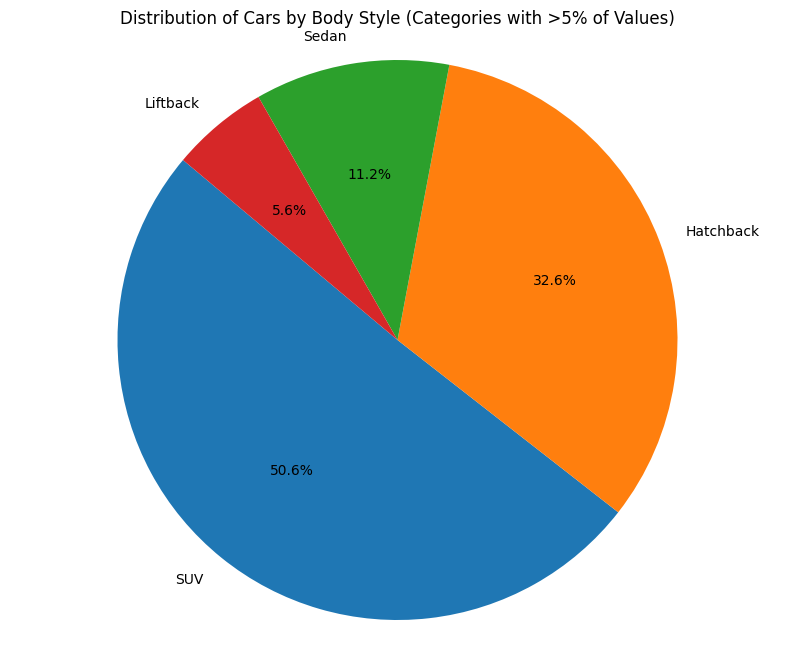

In [172]:
category_counts = df['BodyStyle'].value_counts()

# Calculate the threshold for 5% of the dataset
threshold = 0.05 * len(df)

# Filter categories that have more than 5% of the values
filtered_counts = category_counts[category_counts > threshold]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cars by Body Style (Categories with >5% of Values)')
plt.axis('equal') 
plt.show()

SUV is the top-selling electric car of the dataset given

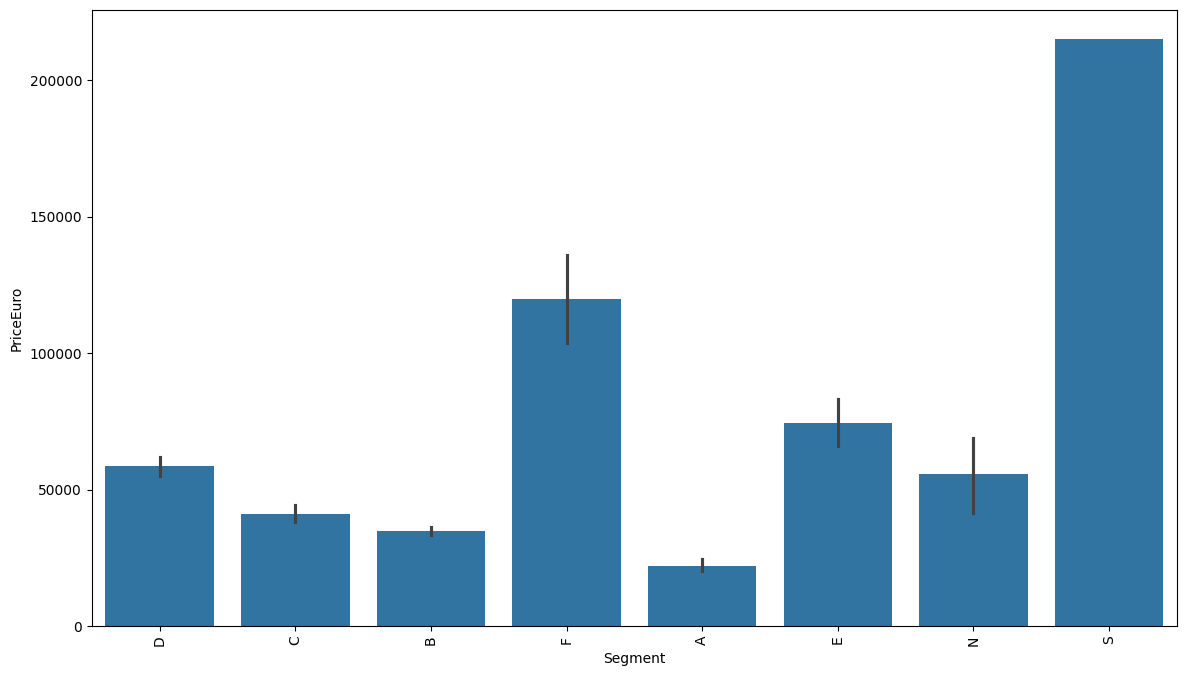

In [173]:
plt.figure(figsize=(14, 8))
sns.barplot(x=df['Segment'], y=df['PriceEuro'])
plt.xticks(rotation='vertical')
plt.show()

S segmet cars are the costliest.

In [175]:
df.to_csv("Finaldataafteranalysis.csv")


#### This is one of the latest python library which provides interface like PowerBI/Excel to drag and drop and perform data analysis and visualization.

In [177]:
df_new = pd.read_csv("Finaldataafteranalysis.csv")
pg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ce3afac19ca1zT0YQOaNFvpUu7e" style="height: auto">\n    <hea…